Merge the water quality data from EPA and WRA.

# Modify WRA data 
Update the column names of WRA's water quality in csv file to be consist with EPA csv.

In [18]:
import pandas as pd
import geopandas as gd
import datetime
date = datetime.datetime.now().strftime('%Y%m%d')

In [2]:
raw_df = pd.read_excel(
    'data/wra_1992-2019_compile_20210421.xlsx',
    index_col=0
    )
csv_df = pd.read_csv('data/database_ZAF_wa_clean_gps_20211008.csv')
shp_df = gd.read_file('data/ZAF_wa_wra_20211008.shp', encoding='big5')

In [9]:
csv_df.columns

Index(['井號', '井名', '井別', '取樣日期', '檢驗日期', 'Hard(mg/L)', 'CL(mg/L)',
       'HCO3(mg/L)', 'SO4(mg/L)', 'NO3_N(mg/L)', 'NH3_N(mg/L)', 'Ca(mg/L)',
       'Mg(mg/L)', 'K(mg/L)', 'Na(mg/L)', 'Aso', 'Fe(mg/L)', 'Mn(mg/L)',
       'Cd(mg/L)', 'ECOLI(個/100mL)', 'TDS(mg/L)', 'ALK(mg/L)', 'Sulfide',
       'Cr(mg/L)', 'Cu(mg/L)', 'Zn(mg/L)', 'Pb(mg/L)', 'Temp(度)', 'PH',
       'EC(uS/cm)', 'Organ_N', 'TOC(mg/L)', 'CO3(mg/L)', 'TSS(mg/L)', 'Eh',
       'sheet', 'Lon', 'Lat'],
      dtype='object')

In [10]:
shp_df.columns

Index(['SiteId', 'SiteName', 'SiteType', 'SampleDate', 'ExamDate',
       'Hard(mg/L)', 'CL(mg/L)', 'HCO3(mg/L)', 'SO4(mg/L)', 'NO3_N(ppm)',
       'NH3_N(ppm)', 'Ca(mg/L)', 'Mg(mg/L)', 'K(mg/L)', 'Na(mg/L)', 'Aso',
       'Fe(mg/L)', 'Mn(mg/L)', 'Cd(mg/L)', 'ECOLI', 'TDS(mg/L)', 'ALK(mg/L)',
       'Sulfide', 'Cr(mg/L)', 'Cu(mg/L)', 'Zn(mg/L)', 'Pb(mg/L)', 'Temp', 'PH',
       'EC(uS/cm)', 'Organ_N', 'TOC(mg/L)', 'CO3(mg/L)', 'TSS(mg/L)', 'Eh',
       'sheet', 'Lon', 'Lat', 'geometry'],
      dtype='object')

In [12]:
new_cols[5].split('(')[1][:-1]

'mg/L'

In [13]:
# seperate the units from the names
new_cols = [
       'SiteId', 'SiteName', 'SiteType', 'SampleDate', 'ExamDate', 'Hard(mg/L)', 'CL(mg/L)',
       'HCO3(mg/L)', 'SO4(mg/L)', 'NO3_N(mg/L)', 'NH3_N(mg/L)', 'Ca(mg/L)',
       'Mg(mg/L)', 'K(mg/L)', 'Na(mg/L)', 'Aso', 'Fe(mg/L)', 'Mn(mg/L)',
       'Cd(mg/L)', 'ECOLI(個/100mL)', 'TDS(mg/L)', 'ALK(mg/L)', 'Sulfide',
       'Cr(mg/L)', 'Cu(mg/L)', 'Zn(mg/L)', 'Pb(mg/L)', 'Temp(度)', 'PH',
       'EC(uS/cm)', 'Organ_N', 'TOC(mg/L)', 'CO3(mg/L)', 'TSS(mg/L)', 'Eh',
       'sheet', 'Lon', 'Lat'
       ]
mo_cols = []
units = []
for name in new_cols:
       if '(' in name:
              s = name.split('(')
              mo_cols.append(s[0])
              units.append(s[1][:-1])
       else:
              mo_cols.append(name)
              units.append('')


In [17]:
cols_df = pd.concat([
    pd.Series(raw_df.columns, name='raw column names'),
    pd.Series(units, name='units'),
    pd.Series(mo_cols, name='csv column names'),
    pd.Series(shp_df.columns, name='shp column names')],
    axis=1, join='outer'
    )
cols_df

,raw column names,units,csv column names,shp column names
0,井號,,SiteId,SiteId
1,井名,,SiteName,SiteName
2,井別,,SiteType,SiteType
3,取樣日期,,SampleDate,SampleDate
4,檢驗日期,,ExamDate,ExamDate
5,Hard(mg/L),mg/L,Hard,Hard(mg/L)
6,CL(mg/L),mg/L,CL,CL(mg/L)
7,HCO3(mg/L),mg/L,HCO3,HCO3(mg/L)
8,SO4(mg/L),mg/L,SO4,SO4(mg/L)
9,NO3_N(mg/L),mg/L,NO3_N,NO3_N(ppm)


In [20]:
# minor modification
units[15] = 'mg/L'
units[22] = 'mg/L'
units[34] = 'mV'

mo_cols[15] = 'As'

In [22]:
csv_df.columns = mo_cols
cols_df = pd.concat([
    pd.Series(raw_df.columns, name='raw column names'),
    pd.Series(units, name='units'),
    pd.Series(csv_df.columns, name='csv column names'),
    pd.Series(shp_df.columns, name='shp column names')],
    axis=1, join='outer'
    )
cols_df

,raw column names,units,csv column names,shp column names
0,井號,,SiteId,SiteId
1,井名,,SiteName,SiteName
2,井別,,SiteType,SiteType
3,取樣日期,,SampleDate,SampleDate
4,檢驗日期,,ExamDate,ExamDate
5,Hard(mg/L),mg/L,Hard,Hard(mg/L)
6,CL(mg/L),mg/L,CL,CL(mg/L)
7,HCO3(mg/L),mg/L,HCO3,HCO3(mg/L)
8,SO4(mg/L),mg/L,SO4,SO4(mg/L)
9,NO3_N(mg/L),mg/L,NO3_N,NO3_N(ppm)


In [23]:
cols_df.to_csv('data/database_ZAF_wra_wa_colnames_{}.csv'.format(date), index=False)
csv_df.to_csv('data/database_ZAF_wa_clean_gps_{}.csv'.format(date), index=False, encoding='utf-8')
print(date)

20211027


# Merge two datasets

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use(['seaborn-colorblind', 'seaborn-talk'])
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta'] # to plot Chinese words properly

import datetime
date = datetime.datetime.now().strftime('%Y%m%d')

In [3]:
wra_df = pd.read_csv('data/database_ZAF_wa_clean_gps_20211027.csv')
wra_df

,SiteId,SiteName,SiteType,SampleDate,ExamDate,Hard,CL,HCO3,SO4,NO3_N,...,PH,EC,Organ_N,TOC,CO3,TSS,Eh,sheet,Lon,Lat
0,9030111,虎尾(1),自記站,1992-06-08,1992-06-08,382.0,12.41,0.0,139.0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1992,120.432291,23.714153
1,9030111,虎尾(1),自記站,1999-01-01,NaN,365.0,13.10,NaN,129.0,0.13,...,7.62,700.0,NaN,2.04,NaN,NaN,137.0,1999,120.432291,23.714153
2,9030111,虎尾(1),自記站,1999-01-01,NaN,365.0,13.10,NaN,129.0,0.13,...,7.62,700.0,NaN,2.04,NaN,NaN,137.0,1999,120.432291,23.714153
3,9030111,虎尾(1),自記站,2000-01-01,NaN,273.0,14.50,NaN,78.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000,120.432291,23.714153
4,9030111,虎尾(1),自記站,2000-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,7.45,997.5,NaN,NaN,NaN,NaN,NaN,2000,120.432291,23.714153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2188,9130222,興化(2),自記站,2019-09-23,NaN,284.0,3.10,255.0,80.9,0.02,...,7.86,346.0,NaN,0.20,1.0,NaN,-38.0,2019,120.289012,23.760169
2189,9130232,興化(3),自記站,2019-09-23,NaN,123.0,2.60,233.0,15.7,0.02,...,7.86,341.0,NaN,0.10,1.0,NaN,-44.0,2019,120.289012,23.760169
2190,9170411,客厝(1),自記站,2019-10-02,NaN,386.0,3.10,257.0,3.0,0.02,...,7.81,281.0,NaN,0.50,1.0,NaN,-37.0,2019,120.342364,23.624799
2191,9170421,客厝(2),自記站,2019-10-02,NaN,217.0,1.60,267.0,2.8,0.02,...,8.06,291.0,NaN,0.70,1.0,NaN,-51.0,2019,120.342364,23.624799


In [4]:
epa_df = pd.read_csv('data/database_ZAF_wl+wa_epa_clean_gps_20211008.csv')
epa_df

,SiteName,Datetime,SiteId,WaterDe_m,Temp,EC,pH,DO,DOS,Hardness,...,TCE,PCE,Cl-ethene,DCE,112-TCE,111-TCE,12-DCB,MTBE,Lon,Lat
0,二崙國小,2000-03-22 00:00:00,4413,NaN,23.5,1130.0,7.00,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.415102,23.771842
1,二崙國小,2000-06-21 00:00:00,4413,NaN,27.0,1060.0,7.30,NaN,NaN,40.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.415102,23.771842
2,二崙國小,2000-08-17 00:00:00,4413,NaN,25.0,1080.0,7.00,NaN,NaN,36.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.415102,23.771842
3,二崙國小,2000-12-20 00:00:00,4413,NaN,25.8,1040.0,7.30,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.415102,23.771842
4,二崙國小,2002-03-14 11:51:00,4413,NaN,27.6,1060.0,7.00,NaN,NaN,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.415102,23.771842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2594,豐安國小,2020-01-13 09:29:00,4206,1.769,26.5,6410.0,7.09,0.10,NaN,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.234671,23.789829
2595,豐安國小,2020-04-23 14:14:00,4206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,120.234671,23.789829
2596,豐安國小,2020-05-13 11:47:00,4206,2.090,27.2,6440.0,7.48,0.45,NaN,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.234671,23.789829
2597,豐安國小,2020-07-10 10:12:00,4206,1.783,27.3,5320.0,7.10,0.00,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.234671,23.789829


### Compiled info
stds_and_cols.xlsx records the consistency of analyte names and units between goverment's standards and datasets (EPA, WRA), which is determined manually.

In [12]:
excel_df = pd.read_excel('data/stds_and_cols.xlsx')
excel_df

,項目,單位,英文,飲用水水源水質標準第五條,飲用水水源水質標準第六條,地下水污染監測標準第一類,地下水污染監測標準第二類,地下水污染管制標準第一類,地下水污染管制標準第二類,灌溉用水水質標準,再生水用於工業用途水質基礎建議值一,再生水用於工業用途水質基礎建議值二,EPA raw column names,EPA units,EPA csv column names,WRA raw column names,WRA units,WRA csv column names
0,溫度,℃,Temp.,NaN,NaN,NaN,NaN,NaN,NaN,35,NaN,NaN,T,度,Temp,Temp(度),度,Temp
1,電導度,μS/cm25℃,EC,NaN,NaN,NaN,NaN,NaN,NaN,750,250,800,EC,μS/cm,EC,EC(uS/cm),uS/cm,EC
2,氫離子濃度指數,NaN,pH,NaN,NaN,NaN,NaN,NaN,NaN,6.0-9.0,6.0-9.0,6.0-8.5,pH,NaN,pH,PH,NaN,PH
3,化學需氧量,mg/L,COD,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,溶氧量,mg/L,DO,NaN,NaN,NaN,NaN,NaN,NaN,3以上,NaN,NaN,DO (Electrode Method),mg/L,DO,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,井別,NaN,Site type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,井別,NaN,SiteType
110,取樣日期,NaN,Sample date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,取樣日期,NaN,SampleDate
111,檢驗日期,NaN,Exam date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,檢驗日期,NaN,ExamDate
112,緯度,NaN,Latitude,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lat,NaN,NaN,Lat


## Overall info from datasets

In [109]:
cols = ['飲用水水源水質標準第五條', '飲用水水源水質標準第六條', '地下水污染監測標準第一類', 
    '地下水污染監測標準第二類', '地下水污染管制標準第一類', '地下水污染管制標準第二類', 
    '灌溉用水水質標準', '再生水用於工業用途水質基礎建議值一', '再生水用於工業用途水質基礎建議值二',
    'EPA csv column names', 'WRA csv column names']
info_df = excel_df[cols].isna()

cols[-1] = '水利署資料'
cols[-2] = '環保署資料'

info_df.index = excel_df['項目']
info_df.columns = cols
info_df

,飲用水水源水質標準第五條,飲用水水源水質標準第六條,地下水污染監測標準第一類,地下水污染監測標準第二類,地下水污染管制標準第一類,地下水污染管制標準第二類,灌溉用水水質標準,再生水用於工業用途水質基礎建議值一,再生水用於工業用途水質基礎建議值二,環保署資料,水利署資料
項目,,,,,,,,,,,
溫度,True,True,True,True,True,True,False,True,True,False,False
電導度,True,True,True,True,True,True,False,False,False,False,False
氫離子濃度指數,True,True,True,True,True,True,False,False,False,False,False
化學需氧量,False,True,True,True,True,True,True,True,True,True,True
溶氧量,True,True,True,True,True,True,False,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...
井別,True,True,True,True,True,True,True,True,True,True,False
取樣日期,True,True,True,True,True,True,True,True,True,True,False
檢驗日期,True,True,True,True,True,True,True,True,True,True,False


20211031


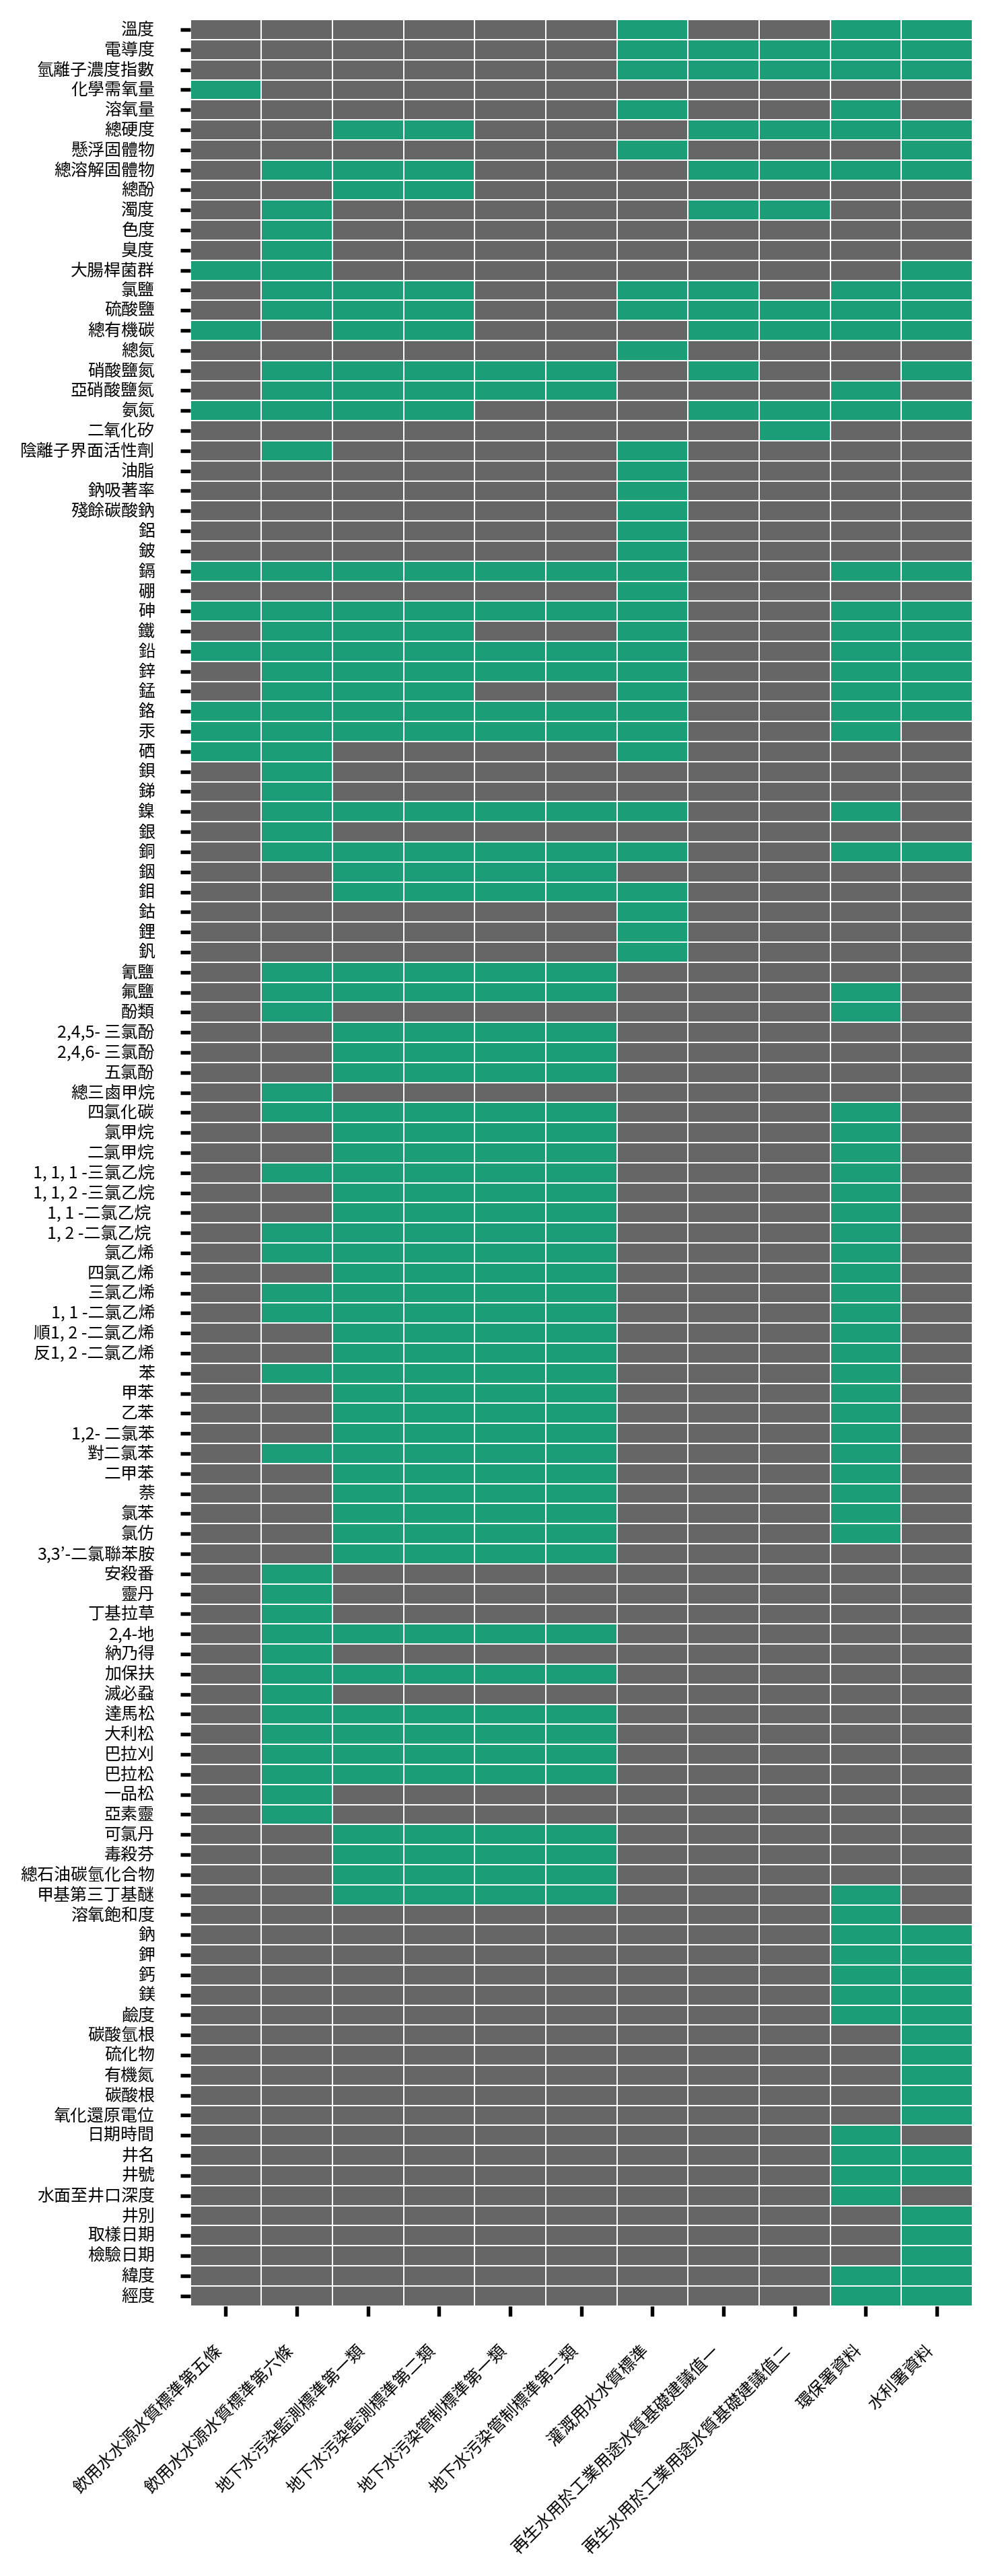

In [ ]:
# green: having values
# gray: no value
fig, ax = plt.subplots(1, 1, figsize=(5, 15))
sns.heatmap(data=info_df.values, 
    xticklabels = info_df.columns,
    yticklabels = info_df.index,
    linewidths=.1, cbar=False, cmap='Dark2', ax=ax)
plt.yticks(fontsize=6)
plt.xticks(fontsize=6, rotation=45, ha='right')
fig.savefig('results/info_heatmap_{}.png'.format(date))
print(date)

## Unify the col names

In [156]:
# build the df having values in EPA water quality data
epa_tmp = epa_df.loc[:,excel_df['EPA csv column names'].dropna()].copy()
epa_tmp.columns = excel_df['項目'][~excel_df['EPA csv column names'].isna()]
epa_tmp['資料來源'] = ['環保署' for _ in range(len(epa_tmp))]
epa_tmp

項目,溫度,電導度,氫離子濃度指數,溶氧量,總硬度,總溶解固體物,氯鹽,硫酸鹽,總有機碳,亞硝酸鹽氮,...,鈣,鎂,鹼度,日期時間,井名,井號,水面至井口深度,緯度,經度,資料來源
0,23.5,1130.0,7.00,NaN,3.0,NaN,22.0,70.0,NaN,0.270,...,37.5,4.4,NaN,2000-03-22 00:00:00,二崙國小,4413,NaN,23.771842,120.415102,環保署
1,27.0,1060.0,7.30,NaN,40.0,NaN,23.0,NaN,NaN,0.025,...,NaN,25.0,NaN,2000-06-21 00:00:00,二崙國小,4413,NaN,23.771842,120.415102,環保署
2,25.0,1080.0,7.00,NaN,36.5,NaN,26.0,4.8,NaN,0.145,...,44.5,1.2,NaN,2000-08-17 00:00:00,二崙國小,4413,NaN,23.771842,120.415102,環保署
3,25.8,1040.0,7.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2000-12-20 00:00:00,二崙國小,4413,NaN,23.771842,120.415102,環保署
4,27.6,1060.0,7.00,NaN,17.0,15.0,4.3,31.0,0.460,0.022,...,NaN,NaN,NaN,2002-03-14 11:51:00,二崙國小,4413,NaN,23.771842,120.415102,環保署
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2594,26.5,6410.0,7.09,0.10,49.0,20.0,195.0,26.0,0.425,0.015,...,NaN,NaN,NaN,2020-01-13 09:29:00,豐安國小,4206,1.769,23.789829,120.234671,環保署
2595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2020-04-23 14:14:00,豐安國小,4206,NaN,23.789829,120.234671,環保署
2596,27.2,6440.0,7.48,0.45,30.0,180.0,440.0,41.0,0.005,0.005,...,34.0,22.0,6.0,2020-05-13 11:47:00,豐安國小,4206,2.090,23.789829,120.234671,環保署
2597,27.3,5320.0,7.10,0.00,4.0,195.0,310.0,44.0,0.265,0.005,...,NaN,NaN,NaN,2020-07-10 10:12:00,豐安國小,4206,1.783,23.789829,120.234671,環保署


In [157]:
# build the df having values in WRA water quality data
# column "sheet" is excluded in the excel file, 
# so wra_tmp has one column fewer than wra_df
wra_tmp = wra_df.loc[:, excel_df['WRA csv column names'].dropna()].copy()
wra_tmp.columns = excel_df['項目'][~excel_df['WRA csv column names'].isna()]
wra_tmp

項目,溫度,電導度,氫離子濃度指數,總硬度,懸浮固體物,總溶解固體物,大腸桿菌群,氯鹽,硫酸鹽,總有機碳,...,有機氮,碳酸根,氧化還原電位,井名,井號,井別,取樣日期,檢驗日期,緯度,經度
0,NaN,NaN,NaN,382.0,NaN,436.0,17.0,12.41,139.0,NaN,...,NaN,NaN,0.0,虎尾(1),9030111,自記站,1992-06-08,1992-06-08,23.714153,120.432291
1,24.50,700.0,7.62,365.0,NaN,506.0,NaN,13.10,129.0,2.04,...,NaN,NaN,137.0,虎尾(1),9030111,自記站,1999-01-01,NaN,23.714153,120.432291
2,24.50,700.0,7.62,365.0,NaN,506.0,0.0,13.10,129.0,2.04,...,NaN,NaN,137.0,虎尾(1),9030111,自記站,1999-01-01,NaN,23.714153,120.432291
3,24.90,NaN,NaN,273.0,NaN,356.0,NaN,14.50,78.7,NaN,...,NaN,NaN,NaN,虎尾(1),9030111,自記站,2000-01-01,NaN,23.714153,120.432291
4,24.65,997.5,7.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,虎尾(1),9030111,自記站,2000-01-01,NaN,23.714153,120.432291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2188,25.10,346.0,7.86,284.0,NaN,798.0,10.0,3.10,80.9,0.20,...,NaN,1.0,-38.0,興化(2),9130222,自記站,2019-09-23,NaN,23.760169,120.289012
2189,24.90,341.0,7.86,123.0,NaN,296.0,120.0,2.60,15.7,0.10,...,NaN,1.0,-44.0,興化(3),9130232,自記站,2019-09-23,NaN,23.760169,120.289012
2190,26.80,281.0,7.81,386.0,NaN,436.0,10.0,3.10,3.0,0.50,...,NaN,1.0,-37.0,客厝(1),9170411,自記站,2019-10-02,NaN,23.624799,120.342364
2191,26.90,291.0,8.06,217.0,NaN,359.0,5.0,1.60,2.8,0.70,...,NaN,1.0,-51.0,客厝(2),9170421,自記站,2019-10-02,NaN,23.624799,120.342364


In [158]:
set(wra_df.columns) - set(excel_df.loc[~excel_df['WRA csv column names'].isna(), 'WRA csv column names'])

{'sheet'}

### Construct datetime in WRA data
Adopt "取樣日期" to build "日期時間". This is to be consistent with EPA data.

In [159]:
wra_tmp['日期時間'] = pd.to_datetime(wra_tmp['取樣日期'])
wra_tmp = wra_tmp.drop(['取樣日期', '檢驗日期'], axis=1)
wra_tmp['資料來源'] = ['水利署' for _ in range(len(wra_tmp))]

In [160]:
merge_df = pd.concat([epa_tmp, wra_tmp], axis=0, join='outer')
merge_df

項目,溫度,電導度,氫離子濃度指數,溶氧量,總硬度,總溶解固體物,氯鹽,硫酸鹽,總有機碳,亞硝酸鹽氮,...,資料來源,懸浮固體物,大腸桿菌群,硝酸鹽氮,碳酸氫根,硫化物,有機氮,碳酸根,氧化還原電位,井別
0,23.5,1130.0,7.00,NaN,3.0,NaN,22.0,70.0,NaN,0.270,...,環保署,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,27.0,1060.0,7.30,NaN,40.0,NaN,23.0,NaN,NaN,0.025,...,環保署,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,25.0,1080.0,7.00,NaN,36.5,NaN,26.0,4.8,NaN,0.145,...,環保署,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25.8,1040.0,7.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,環保署,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,27.6,1060.0,7.00,NaN,17.0,15.0,4.3,31.0,0.46,0.022,...,環保署,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2188,25.1,346.0,7.86,NaN,284.0,798.0,3.1,80.9,0.20,NaN,...,水利署,NaN,10.0,0.02,255.0,0.02,NaN,1.0,-38.0,自記站
2189,24.9,341.0,7.86,NaN,123.0,296.0,2.6,15.7,0.10,NaN,...,水利署,NaN,120.0,0.02,233.0,0.02,NaN,1.0,-44.0,自記站
2190,26.8,281.0,7.81,NaN,386.0,436.0,3.1,3.0,0.50,NaN,...,水利署,NaN,10.0,0.02,257.0,0.03,NaN,1.0,-37.0,自記站
2191,26.9,291.0,8.06,NaN,217.0,359.0,1.6,2.8,0.70,NaN,...,水利署,NaN,5.0,0.02,267.0,0.02,NaN,1.0,-51.0,自記站


In [161]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4792 entries, 0 to 2192
Data columns (total 68 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   溫度             4083 non-null   float64
 1   電導度            3981 non-null   float64
 2   氫離子濃度指數        3906 non-null   float64
 3   溶氧量            493 non-null    float64
 4   總硬度            2751 non-null   float64
 5   總溶解固體物         2741 non-null   float64
 6   氯鹽             3809 non-null   float64
 7   硫酸鹽            3750 non-null   float64
 8   總有機碳           3710 non-null   float64
 9   亞硝酸鹽氮          2246 non-null   float64
 10  氨氮             3908 non-null   float64
 11  鎘              3019 non-null   float64
 12  砷              3468 non-null   float64
 13  鐵              3821 non-null   float64
 14  鉛              2829 non-null   float64
 15  鋅              3581 non-null   float64
 16  錳              3842 non-null   float64
 17  鉻              3002 non-null   float64
 18  汞       

20211031


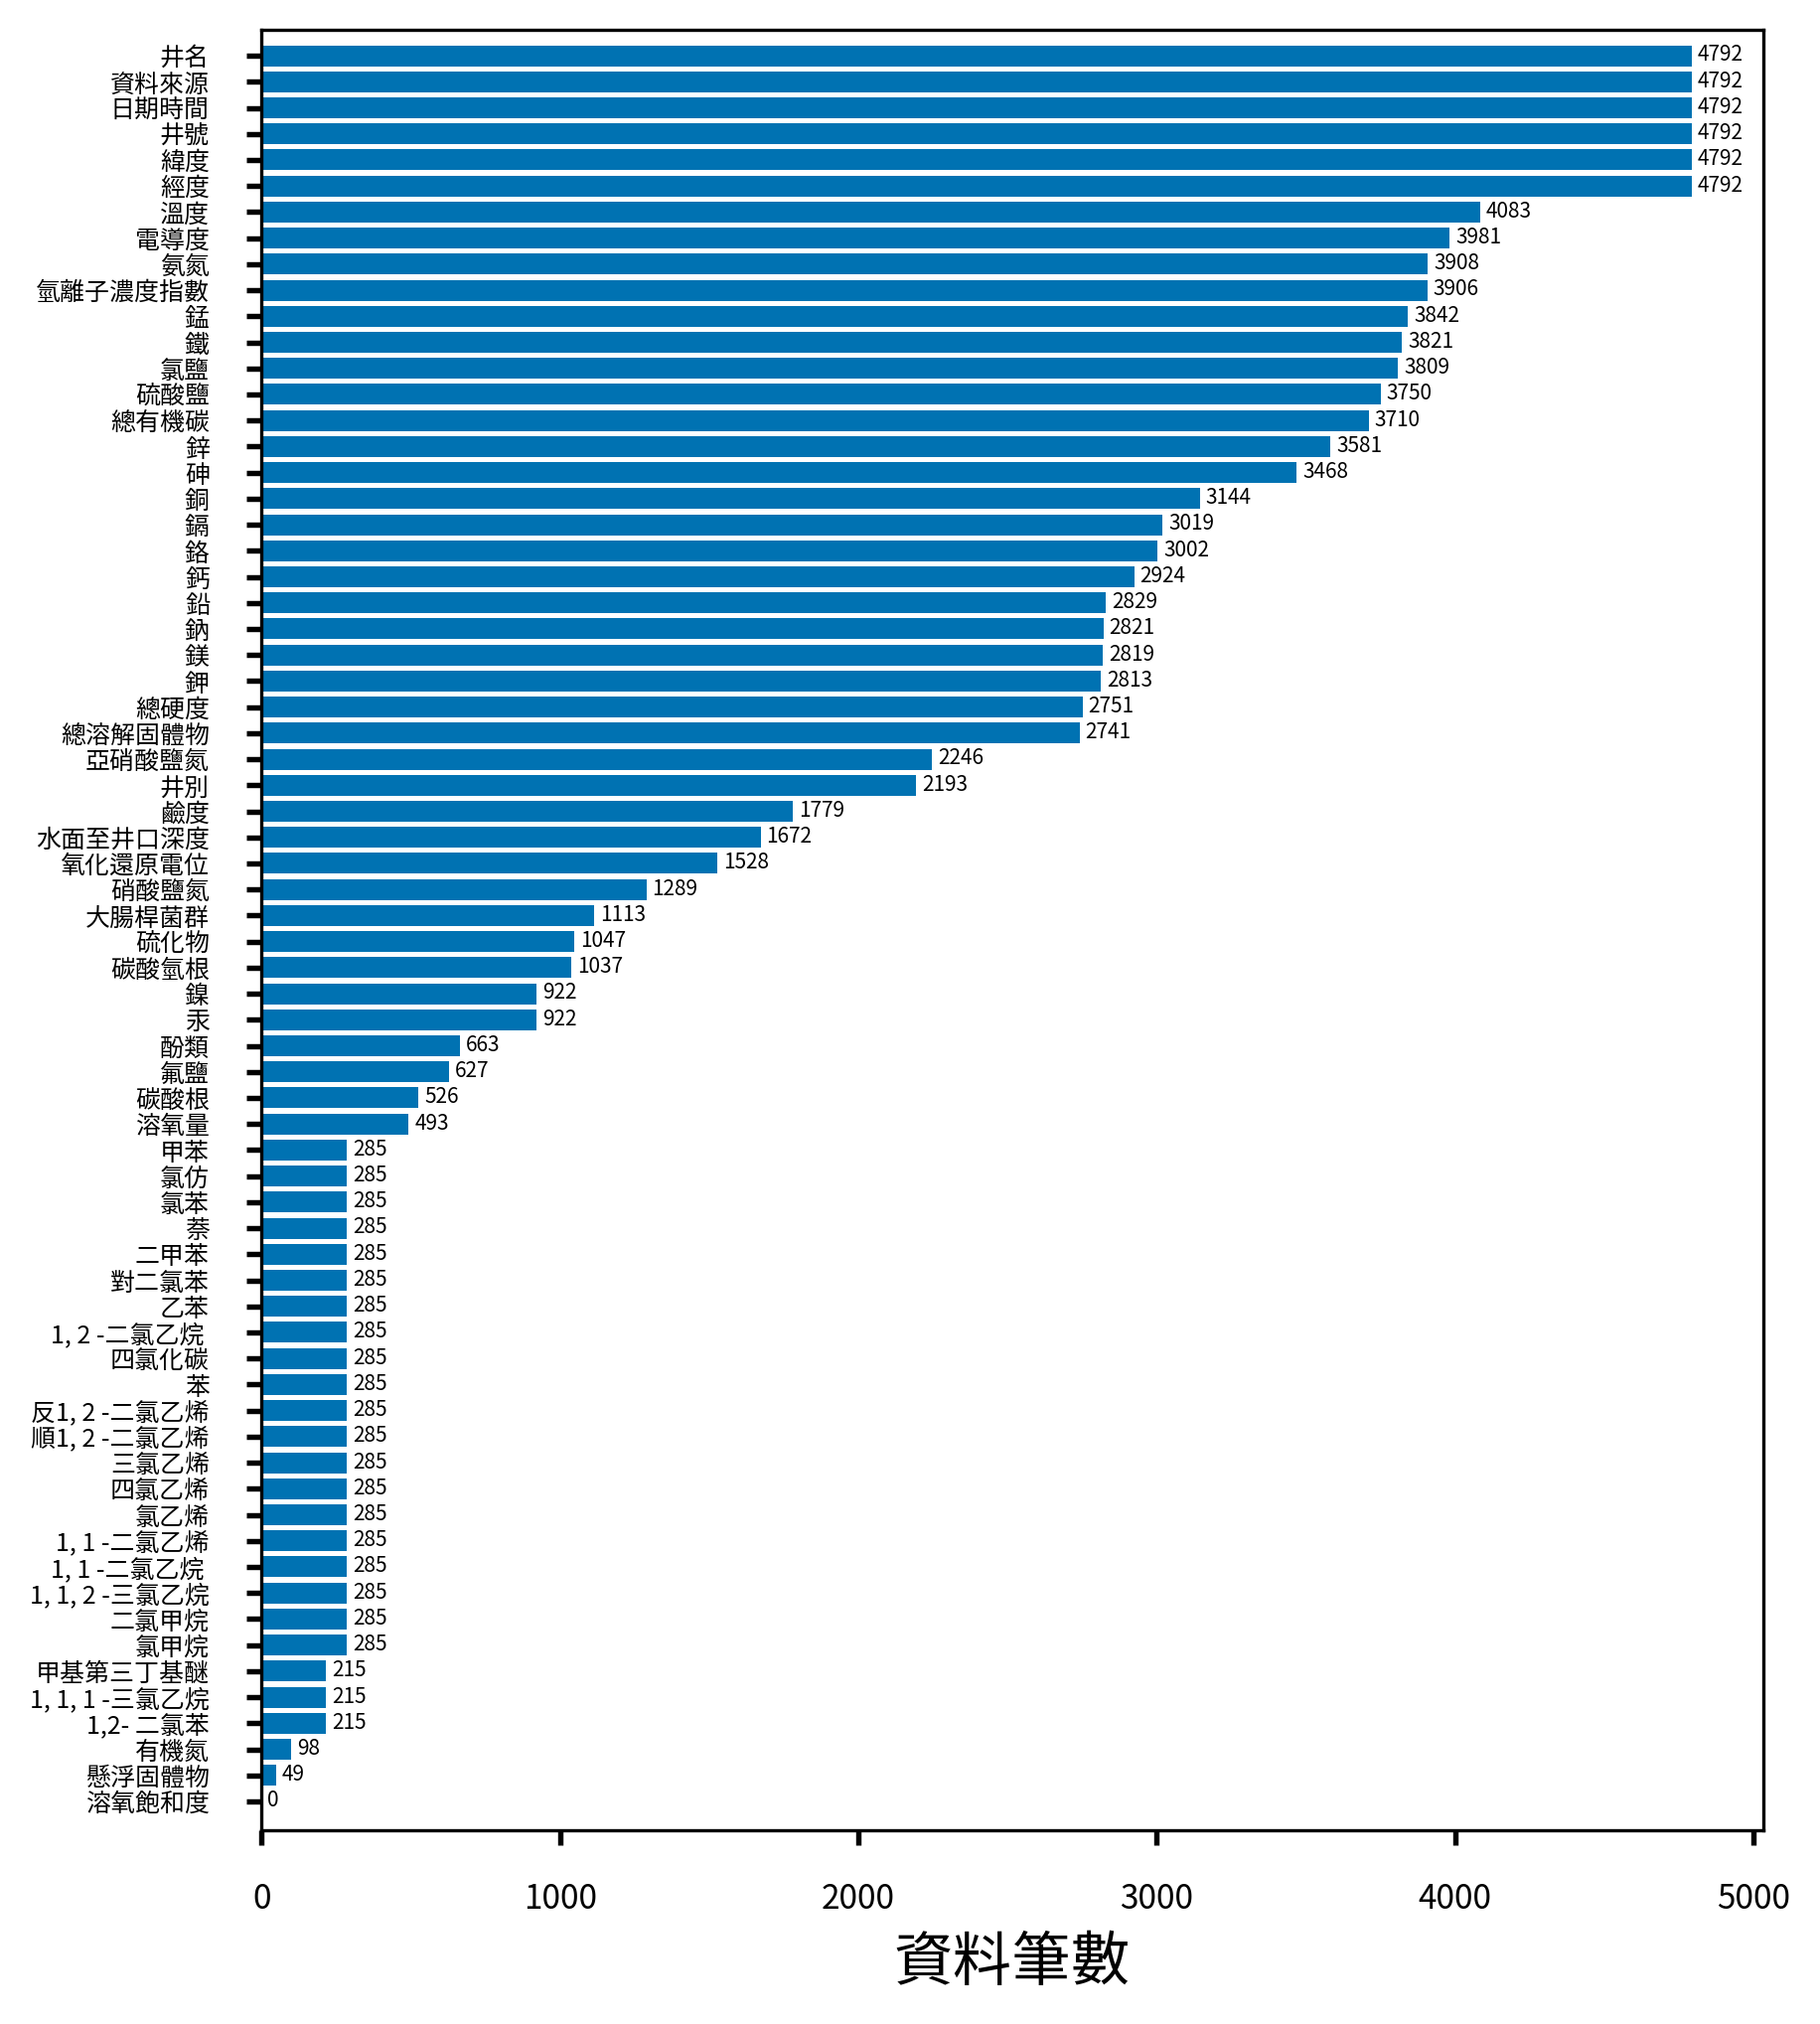

In [163]:
counts = []
for col in merge_df.columns:
    counts.append(merge_df[col].count())
idx = np.argsort(counts)
counts = np.array(counts)

plt.figure(figsize=(6.5, 8))
plt.barh(range(1, len(counts)+1), counts[idx], 
    tick_label=merge_df.columns[idx], color='C0')
plt.ylim(-.1, len(counts)+1)
plt.yticks(fontsize=6)
plt.xticks(fontsize=8)

# mark the data amount
for i, count in enumerate(counts[idx]):
    plt.text(x=count+20, y=i+.8, s=count, fontsize=5)

plt.xlabel('資料筆數')
plt.savefig('results/info_merged_datacount_{}.png'.format(date))
print(date)

時間日期、緯度、經度、井號、井名 have the whole measurements, while the rest analytes have missing values. 溶氧飽和度 is listed in EPA only, but no value is in it either. Therefore, I would simply remove it from the mergerd dataset.

In [164]:
merge_df.columns[idx].values[:0:-1]

array(['井名', '資料來源', '日期時間', '井號', '緯度', '經度', '溫度', '電導度', '氨氮',
       '氫離子濃度指數', '錳', '鐵', '氯鹽', '硫酸鹽', '總有機碳', '鋅', '砷', '銅', '鎘', '鉻',
       '鈣', '鉛', '鈉', '鎂', '鉀', '總硬度', '總溶解固體物', '亞硝酸鹽氮', '井別', '鹼度',
       '水面至井口深度', '氧化還原電位', '硝酸鹽氮', '大腸桿菌群', '硫化物', '碳酸氫根', '鎳', '汞',
       '酚類', '氟鹽', '碳酸根', '溶氧量', '甲苯', '氯仿', '氯苯', '萘', '二甲苯', '對二氯苯',
       '乙苯', '1, 2 -二氯乙烷 ', '四氯化碳', '苯', '反1, 2 -二氯乙烯', '順1, 2 -二氯乙烯',
       '三氯乙烯', '四氯乙烯', '氯乙烯', '1, 1 -二氯乙烯', '1, 1 -二氯乙烷 ',
       '1, 1, 2 -三氯乙烷', '二氯甲烷', '氯甲烷', '甲基第三丁基醚', '1, 1, 1 -三氯乙烷',
       '1,2- 二氯苯', '有機氮', '懸浮固體物'], dtype=object)

In [165]:
# exclude 溶氧飽和度 
# sort the column names by the counts
out = merge_df[merge_df.columns[idx].values[:0:-1]]
out.to_excel('data/database_ZAF_wa_merged_{}.xlsx'.format(date), index=False)
print(date)

20211031
